# Part B: Heart Attack Analysis and Prediction
# חלק ב: אנליזה וניבוי של התקפי לב

---

## Medical Scenario / תרחיש רפואי:
**Professor Shlomo Cohen**, a cardiology specialist at New-Israel Hospital, needs our help to build a model to predict heart attacks and save lives.

---

## Objective / מטרה:
Build a **Logistic Regression model** to predict the risk of heart attack based on patient medical data.

---

## Dataset Features:
- **age**: Age of the patient
- **sex**: Sex (1 = male, 0 = female)
- **cp**: Chest Pain type (0-3)
  - 0: asymptomatic
  - 1: typical angina
  - 2: atypical angina
  - 3: non-anginal pain
- **trtbps**: Resting blood pressure (mm Hg)
- **chol**: Cholesterol (mg/dl)
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting ECG results (0-2)
  - 0: normal
  - 1: ST-T wave abnormality
  - 2: left ventricular hypertrophy
- **thalachh**: Maximum heart rate achieved
- **exng**: Exercise induced angina (1 = yes, 0 = no)
- **ca**: Number of major vessels (0-3)
- **target**: 0 = less chance of heart attack, 1 = more chance of heart attack (TARGET VARIABLE)

---

## ⚕️ IMPORTANT: Medical Context
In medical diagnosis, **missing a sick patient (False Negative) is more dangerous** than a false alarm (False Positive). We'll discuss this when evaluating our model!

---


## Step 1: Import Required Libraries
## שלב 1: ייבוא ספריות נדרשות

We'll import libraries for:
- **Data manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn (Logistic Regression and metrics)


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Settings for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ All libraries imported successfully!")
print("🏥 Ready to build a life-saving heart attack prediction model!")


✅ All libraries imported successfully!
🏥 Ready to build a life-saving heart attack prediction model!


## Step 2: Load and Explore the Data
## שלב 2: טעינת וחקירת הנתונים

Let's load the heart attack dataset and understand its structure.


In [2]:
# Load the dataset
df = pd.read_csv('Project Heart attack data.csv')

print("🏥 Heart Attack Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape[0]} patients × {df.shape[1]} features")
print("="*60)

# Display first few rows
print("\n📊 First 10 patients in the dataset:")
df.head(10)


🏥 Heart Attack Dataset loaded successfully!

Dataset Shape: 298 patients × 11 features

📊 First 10 patients in the dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,ca,target
0,62,1,2,130,231,0,1,146,0,3,1
1,52,1,0,108,233,1,1,147,0,3,1
2,53,1,2,130,246,1,0,173,0,3,1
3,67,1,0,160,286,0,0,108,1,3,0
4,65,0,0,150,225,0,0,114,0,3,0
5,58,1,0,128,216,0,0,131,1,3,0
6,62,0,0,160,164,0,0,145,0,3,0
7,49,1,2,120,188,0,1,139,0,3,0
8,63,1,0,130,330,1,0,132,1,3,0
9,63,0,0,150,407,0,0,154,0,3,0


In [3]:
# Display dataset information
print("\n📋 Dataset Information:")
print("="*60)
df.info()

print("\n\n📌 Column Names:")
print(list(df.columns))



📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       298 non-null    int64
 1   sex       298 non-null    int64
 2   cp        298 non-null    int64
 3   trtbps    298 non-null    int64
 4   chol      298 non-null    int64
 5   fbs       298 non-null    int64
 6   restecg   298 non-null    int64
 7   thalachh  298 non-null    int64
 8   exng      298 non-null    int64
 9   ca        298 non-null    int64
 10  target    298 non-null    int64
dtypes: int64(11)
memory usage: 25.7 KB


📌 Column Names:
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'ca', 'target']


In [4]:
# Check for missing values
print("\n🔍 Missing Values Check:")
print("="*60)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])



🔍 Missing Values Check:
✅ No missing values found in the dataset!


In [5]:
# Statistical summary
print("\n📊 Statistical Summary:")
print("="*60)
df.describe().round(2)



📊 Statistical Summary:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,ca,target
count,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00,298.00
mean,54.51,0.68,0.96,131.58,246.91,0.15,0.52,149.47,0.33,0.67,0.54
std,9.03,0.47,1.03,17.67,51.89,0.36,0.53,22.98,0.47,0.94,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00
50%,56.00,1.00,1.00,130.00,241.50,0.00,1.00,152.50,0.00,0.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,165.75,1.00,1.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,3.00,1.00



🎯 Target Variable Distribution:
target
1    161
0    137
Name: count, dtype: int64

Percentage distribution:
target
1    54.026846
0    45.973154
Name: proportion, dtype: float64


TypeError: Axes.pie() got an unexpected keyword argument 'alpha'

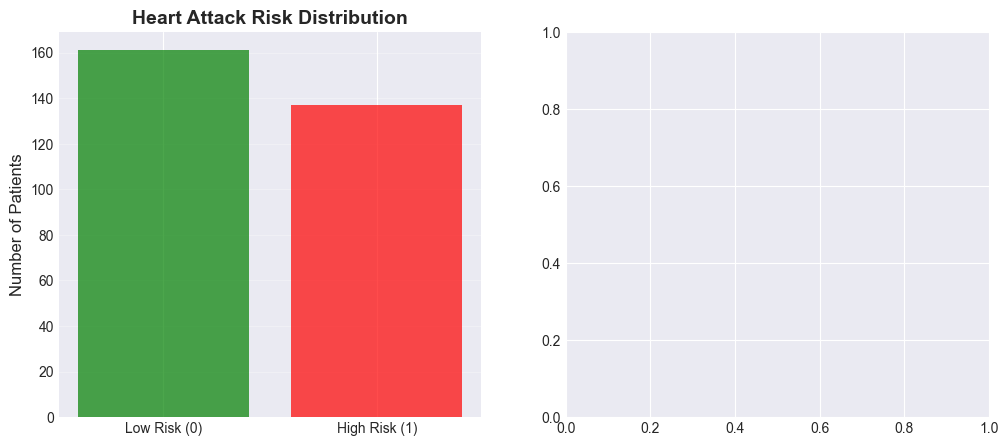

In [6]:
# Check target variable distribution
print("\n🎯 Target Variable Distribution:")
print("="*60)
target_counts = df['target'].value_counts()
print(target_counts)
print(f"\nPercentage distribution:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
axes[0].bar(['Low Risk (0)', 'High Risk (1)'], target_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Heart Attack Risk Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(target_counts.values, labels=['Low Risk (0)', 'High Risk (1)'], 
            autopct='%1.1f%%', colors=['green', 'red'], alpha=0.7, startangle=90)
axes[1].set_title('Heart Attack Risk Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📌 Note: The dataset is fairly balanced between high and low risk patients.")


## Step 3: Exploratory Data Analysis (EDA)
## שלב 3: אנליזה חקרתית של הנתונים

Let's understand the relationships between features and heart attack risk.



🔗 Correlation Analysis with Heart Attack Risk:
target      1.000000
cp          0.427151
thalachh    0.417844
restecg     0.124487
fbs        -0.014649
chol       -0.074977
trtbps     -0.148283
age        -0.224151
sex        -0.290113
exng       -0.429199
ca         -0.464357
Name: target, dtype: float64


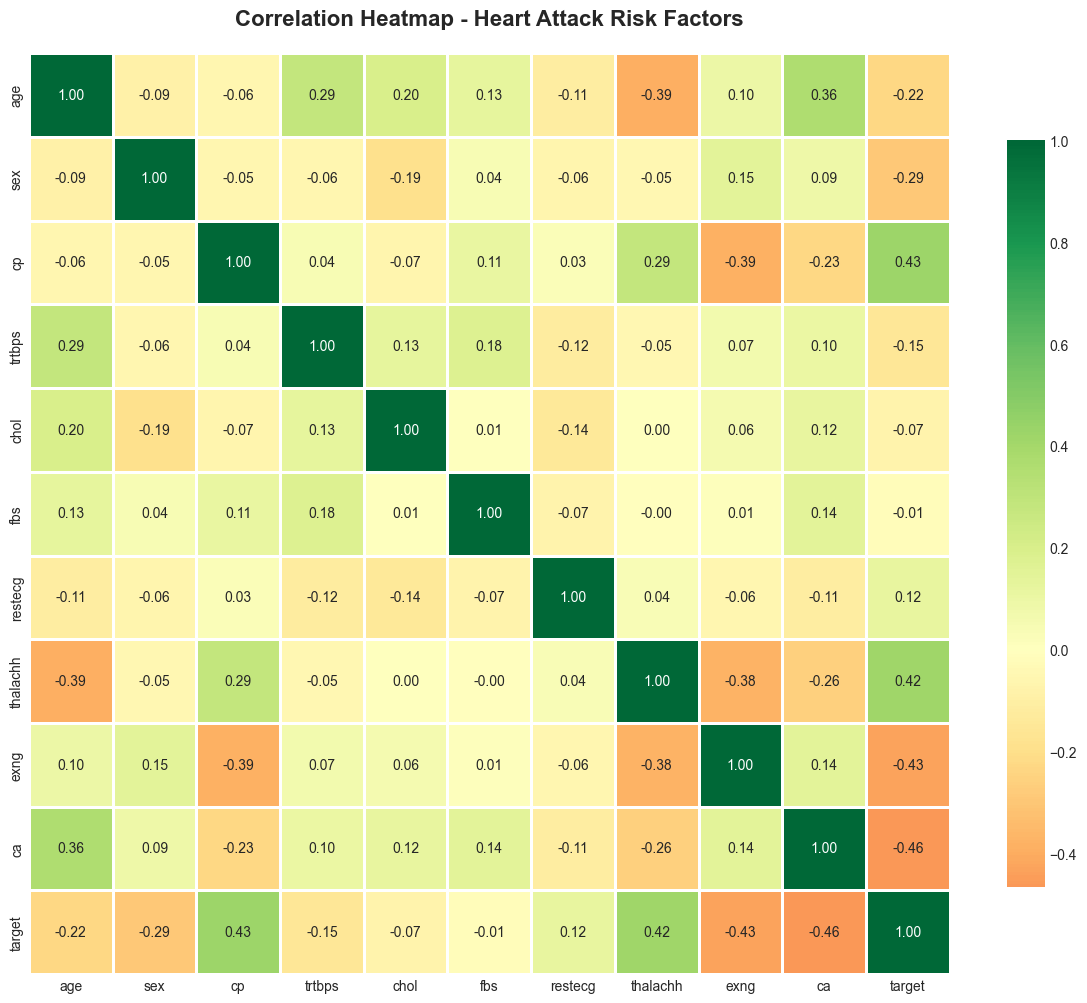


📌 Key Findings:
   - Positive correlations (increase risk): cp, thalachh
   - Negative correlations (decrease risk): exng, ca, age
   - Understanding these relationships helps the cardiologist!


In [7]:
# 3.1 - Correlation Analysis
print("\n🔗 Correlation Analysis with Heart Attack Risk:")
print("="*60)

# Calculate correlations
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, center=0)
plt.title('Correlation Heatmap - Heart Attack Risk Factors', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📌 Key Findings:")
print("   - Positive correlations (increase risk): cp, thalachh")
print("   - Negative correlations (decrease risk): exng, ca, age")
print("   - Understanding these relationships helps the cardiologist!")


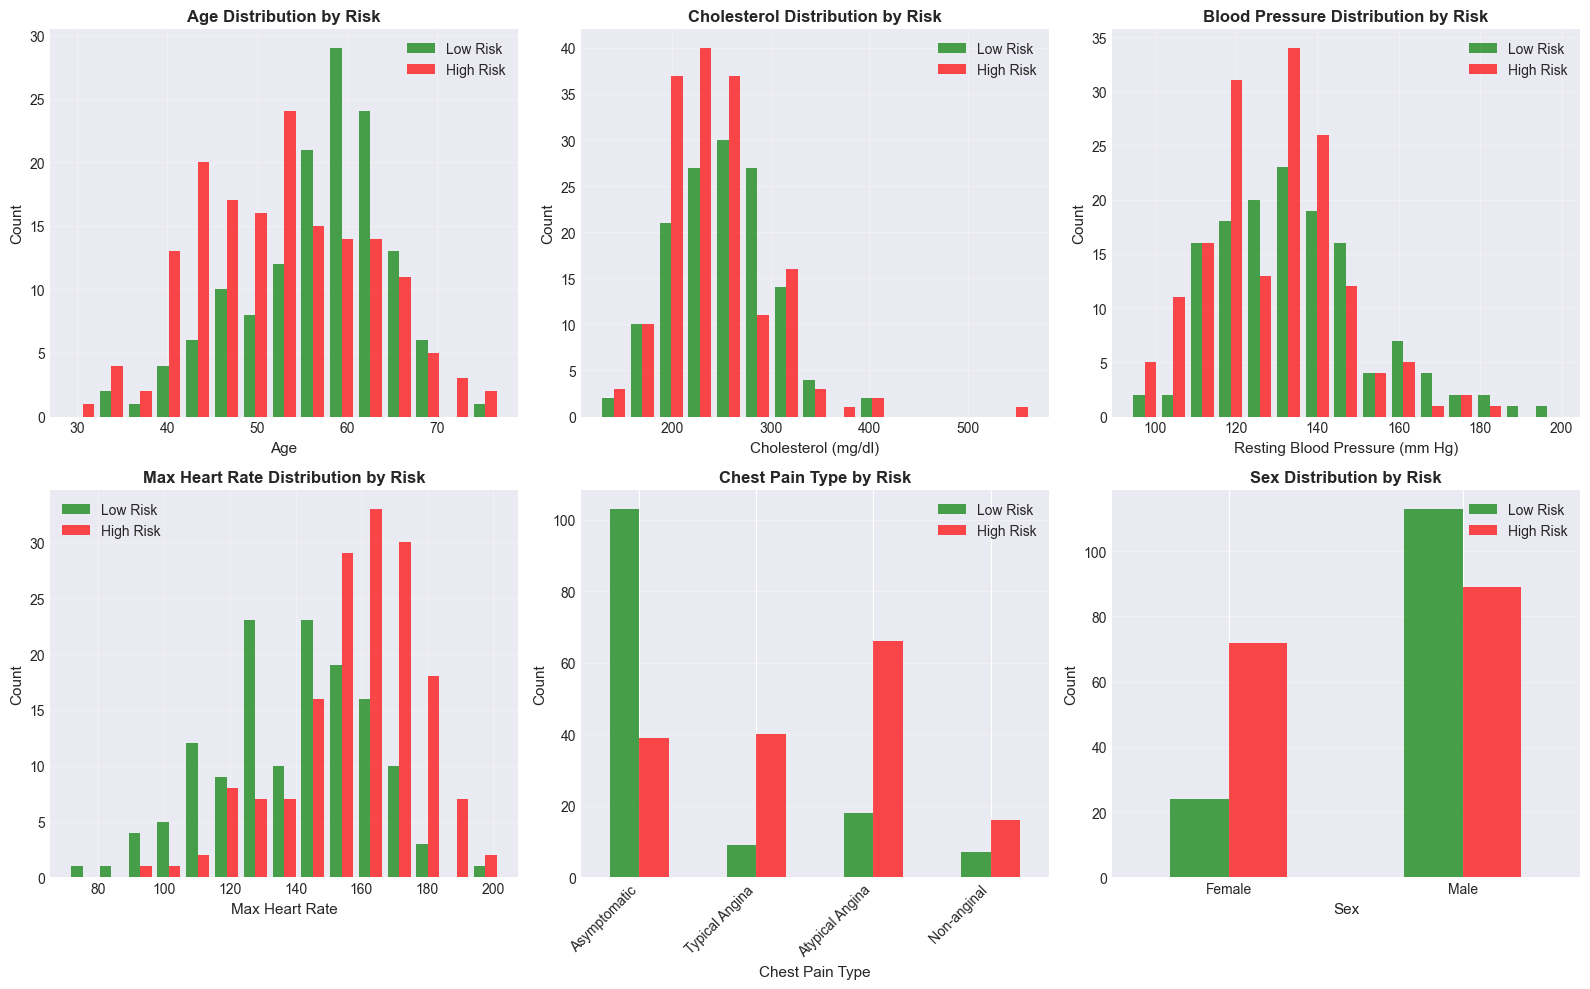


📌 Medical Observations:
   - Chest pain type (cp) shows strong association with heart attack risk
   - Higher max heart rate appears in high-risk patients
   - Sex distribution shows differences in risk patterns


In [8]:
# 3.2 - Visualize key medical features by heart attack risk
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Age distribution
axes[0, 0].hist([df[df['target']==0]['age'], df[df['target']==1]['age']], 
                label=['Low Risk', 'High Risk'], bins=15, color=['green', 'red'], alpha=0.7)
axes[0, 0].set_xlabel('Age', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].set_title('Age Distribution by Risk', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Cholesterol
axes[0, 1].hist([df[df['target']==0]['chol'], df[df['target']==1]['chol']], 
                label=['Low Risk', 'High Risk'], bins=15, color=['green', 'red'], alpha=0.7)
axes[0, 1].set_xlabel('Cholesterol (mg/dl)', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].set_title('Cholesterol Distribution by Risk', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Blood Pressure
axes[0, 2].hist([df[df['target']==0]['trtbps'], df[df['target']==1]['trtbps']], 
                label=['Low Risk', 'High Risk'], bins=15, color=['green', 'red'], alpha=0.7)
axes[0, 2].set_xlabel('Resting Blood Pressure (mm Hg)', fontsize=11)
axes[0, 2].set_ylabel('Count', fontsize=11)
axes[0, 2].set_title('Blood Pressure Distribution by Risk', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Max Heart Rate
axes[1, 0].hist([df[df['target']==0]['thalachh'], df[df['target']==1]['thalachh']], 
                label=['Low Risk', 'High Risk'], bins=15, color=['green', 'red'], alpha=0.7)
axes[1, 0].set_xlabel('Max Heart Rate', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].set_title('Max Heart Rate Distribution by Risk', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Chest Pain Type
cp_counts = df.groupby(['cp', 'target']).size().unstack()
cp_counts.plot(kind='bar', ax=axes[1, 1], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_xlabel('Chest Pain Type', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].set_title('Chest Pain Type by Risk', fontsize=12, fontweight='bold')
axes[1, 1].legend(['Low Risk', 'High Risk'])
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticklabels(['Asymptomatic', 'Typical Angina', 'Atypical Angina', 'Non-anginal'], rotation=45, ha='right')

# Sex distribution
sex_counts = df.groupby(['sex', 'target']).size().unstack()
sex_counts.plot(kind='bar', ax=axes[1, 2], color=['green', 'red'], alpha=0.7)
axes[1, 2].set_xlabel('Sex', fontsize=11)
axes[1, 2].set_ylabel('Count', fontsize=11)
axes[1, 2].set_title('Sex Distribution by Risk', fontsize=12, fontweight='bold')
axes[1, 2].legend(['Low Risk', 'High Risk'])
axes[1, 2].grid(True, alpha=0.3, axis='y')
axes[1, 2].set_xticklabels(['Female', 'Male'], rotation=0)

plt.tight_layout()
plt.show()

print("\n📌 Medical Observations:")
print("   - Chest pain type (cp) shows strong association with heart attack risk")
print("   - Higher max heart rate appears in high-risk patients")
print("   - Sex distribution shows differences in risk patterns")


## Step 4: Categorical Variable Encoding
## שלב 4: קידוד משתנים קטגוריאליים

### בצעו קידוד מתאים למשתנים קטגוריאליים (Perform appropriate encoding)

We need to check which variables are categorical and encode them properly:
- **cp** (Chest Pain): 4 categories (0-3) → Need One-Hot Encoding
- **restecg** (Resting ECG): 3 categories (0-2) → Need One-Hot Encoding
- **ca** (Number of vessels): Could be treated as numeric or categorical → We'll treat as numeric (ordinal)
- Binary variables (sex, fbs, exng) → Already encoded as 0/1 ✅


In [9]:
# Check unique values for categorical variables
print("\n🔍 Checking Categorical Variables:")
print("="*60)
print(f"cp (Chest Pain) unique values: {sorted(df['cp'].unique())}")
print(f"restecg (Resting ECG) unique values: {sorted(df['restecg'].unique())}")
print(f"ca (Number of vessels) unique values: {sorted(df['ca'].unique())}")

print("\n\n💡 Encoding Strategy:")
print("="*60)
print("1. cp (Chest Pain): One-Hot Encoding (4 nominal categories)")
print("2. restecg (Resting ECG): One-Hot Encoding (3 nominal categories)")
print("3. sex, fbs, exng: Already binary encoded (0/1) ✅")
print("4. ca, age, trtbps, chol, thalachh: Numeric features ✅")



🔍 Checking Categorical Variables:
cp (Chest Pain) unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
restecg (Resting ECG) unique values: [np.int64(0), np.int64(1), np.int64(2)]
ca (Number of vessels) unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


💡 Encoding Strategy:
1. cp (Chest Pain): One-Hot Encoding (4 nominal categories)
2. restecg (Resting ECG): One-Hot Encoding (3 nominal categories)
3. sex, fbs, exng: Already binary encoded (0/1) ✅
4. ca, age, trtbps, chol, thalachh: Numeric features ✅


In [10]:
# Perform One-Hot Encoding for cp and restecg
print("\n🔧 Applying One-Hot Encoding...")
print("="*60)

# Create a copy of the dataframe
df_encoded = df.copy()

# One-Hot Encoding for 'cp' (Chest Pain)
cp_dummies = pd.get_dummies(df_encoded['cp'], prefix='cp', drop_first=True)
df_encoded = pd.concat([df_encoded, cp_dummies], axis=1)
df_encoded.drop('cp', axis=1, inplace=True)

# One-Hot Encoding for 'restecg' (Resting ECG)
restecg_dummies = pd.get_dummies(df_encoded['restecg'], prefix='restecg', drop_first=True)
df_encoded = pd.concat([df_encoded, restecg_dummies], axis=1)
df_encoded.drop('restecg', axis=1, inplace=True)

print(f"✅ Encoding complete!")
print(f"\nOriginal shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"\nNew columns after encoding:")
print(list(df_encoded.columns))

print("\n📌 Explanation:")
print("   - We used drop_first=True to avoid multicollinearity (dummy variable trap)")
print("   - cp_1, cp_2, cp_3 represent chest pain types 1, 2, 3 (0 is reference)")
print("   - restecg_1, restecg_2 represent ECG results 1, 2 (0 is reference)")



🔧 Applying One-Hot Encoding...
✅ Encoding complete!

Original shape: (298, 11)
Encoded shape: (298, 14)

New columns after encoding:
['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2']

📌 Explanation:
   - We used drop_first=True to avoid multicollinearity (dummy variable trap)
   - cp_1, cp_2, cp_3 represent chest pain types 1, 2, 3 (0 is reference)
   - restecg_1, restecg_2 represent ECG results 1, 2 (0 is reference)


## Step 5: Prepare Data for Modeling
## שלב 5: הכנת הנתונים למידול

Separate features and target, then split into training and test sets.


In [11]:
# Separate features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

print("\n📦 Data Preparation:")
print("="*60)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)} total):")
print(list(X.columns))



📦 Data Preparation:
Features (X) shape: (298, 13)
Target (y) shape: (298,)

Feature columns (13 total):
['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2']


In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✂️ Train-Test Split Complete:")
print("="*60)
print(f"Training set: {X_train.shape[0]} patients ({X_train.shape[0]/len(df_encoded)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} patients ({X_test.shape[0]/len(df_encoded)*100:.1f}%)")

print("\n🎯 Target distribution in training set:")
print(y_train.value_counts())
print("\n🎯 Target distribution in test set:")
print(y_test.value_counts())

print("\n📌 Note: We used stratify=y to maintain the same proportion of risk levels in both sets.")



✂️ Train-Test Split Complete:
Training set: 238 patients (79.9%)
Test set: 60 patients (20.1%)

🎯 Target distribution in training set:
target
1    129
0    109
Name: count, dtype: int64

🎯 Target distribution in test set:
target
1    32
0    28
Name: count, dtype: int64

📌 Note: We used stratify=y to maintain the same proportion of risk levels in both sets.


In [13]:
# Feature Scaling (important for Logistic Regression)
print("\n⚖️ Feature Scaling:")
print("="*60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")
print("\n📌 Why scaling?")
print("   - Logistic Regression is sensitive to feature scales")
print("   - Scaling ensures all features contribute equally")
print("   - Improves model convergence and performance")



⚖️ Feature Scaling:
✅ Features scaled using StandardScaler

📌 Why scaling?
   - Logistic Regression is sensitive to feature scales
   - Scaling ensures all features contribute equally
   - Improves model convergence and performance


## Step 6: Build Logistic Regression Model
## שלב 6: בניית מודל רגרסיה לוגיסטית

### בניית מודל (Model Building)

**Logistic Regression** is perfect for binary classification (0 or 1, Low Risk or High Risk).

It predicts the **probability** that a patient is at high risk of heart attack:
- Output between 0 and 1
- If probability > 0.5 → Predict High Risk (1)
- If probability ≤ 0.5 → Predict Low Risk (0)


In [14]:
# Create and train the Logistic Regression model
print("\n🤖 Training Logistic Regression Model...")
print("="*60)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train (fit) the model on training data
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")
print(f"\n📊 Model Parameters:")
print(f"   - Number of features: {len(model.coef_[0])}")
print(f"   - Intercept: {model.intercept_[0]:.4f}")
print(f"   - Convergence iterations: completed within {model.n_iter_[0]} iterations")

print("\n📌 The model has learned patterns from patient data to predict heart attack risk!")



🤖 Training Logistic Regression Model...
✅ Model trained successfully!

📊 Model Parameters:
   - Number of features: 13
   - Intercept: 0.0861
   - Convergence iterations: completed within 8 iterations

📌 The model has learned patterns from patient data to predict heart attack risk!


## Step 7: Model Evaluation - Performance Metrics
## שלב 7: הערכת ביצועי המודל - מטריקות

### הערכת ביצועים (Performance Evaluation)

We'll calculate **4 critical metrics** as required:

1. **Accuracy**: Overall correctness (correct predictions / total predictions)
2. **Precision**: Of those predicted as High Risk, how many truly are? (TP / (TP + FP))
3. **Recall (Sensitivity)**: Of all actual High Risk patients, how many did we catch? (TP / (TP + FN))
4. **F1-Score**: Harmonic mean of Precision and Recall

### Confusion Matrix Legend:
- **TP (True Positive)**: Correctly predicted High Risk
- **TN (True Negative)**: Correctly predicted Low Risk
- **FP (False Positive)**: Predicted High Risk, but actually Low Risk
- **FN (False Negative)**: Predicted Low Risk, but actually High Risk ⚠️ **DANGEROUS!**


In [15]:
# Make predictions on test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

print("\n🔮 Predictions generated for test set!")
print(f"Test set size: {len(y_test)} patients")



🔮 Predictions generated for test set!
Test set size: 60 patients


In [17]:
# Calculate all 4 required metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📈 MODEL PERFORMANCE METRICS:")
print("="*60)
print(f"✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✓ Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"✓ Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print("="*60)

print("\n📌 Metrics Interpretation:")
print(f"   • Accuracy:  {accuracy*100:.1f}% of all predictions are correct")
print(f"   • Precision: {precision*100:.1f}% of predicted high-risk patients are truly high-risk")
print(f"   • Recall:    {recall*100:.1f}% of actual high-risk patients were correctly identified")
print(f"   • F1-Score:  {f1*100:.1f}% - balanced measure between Precision and Recall")



📈 MODEL PERFORMANCE METRICS:
✓ Accuracy:  0.7667 (76.67%)
✓ Precision: 0.7647 (76.47%)
✓ Recall:    0.8125 (81.25%)
✓ F1-Score:  0.7879 (78.79%)

📌 Metrics Interpretation:
   • Accuracy:  76.7% of all predictions are correct
   • Precision: 76.5% of predicted high-risk patients are truly high-risk
   • Recall:    81.2% of actual high-risk patients were correctly identified
   • F1-Score:  78.8% - balanced measure between Precision and Recall



🔍 CONFUSION MATRIX:


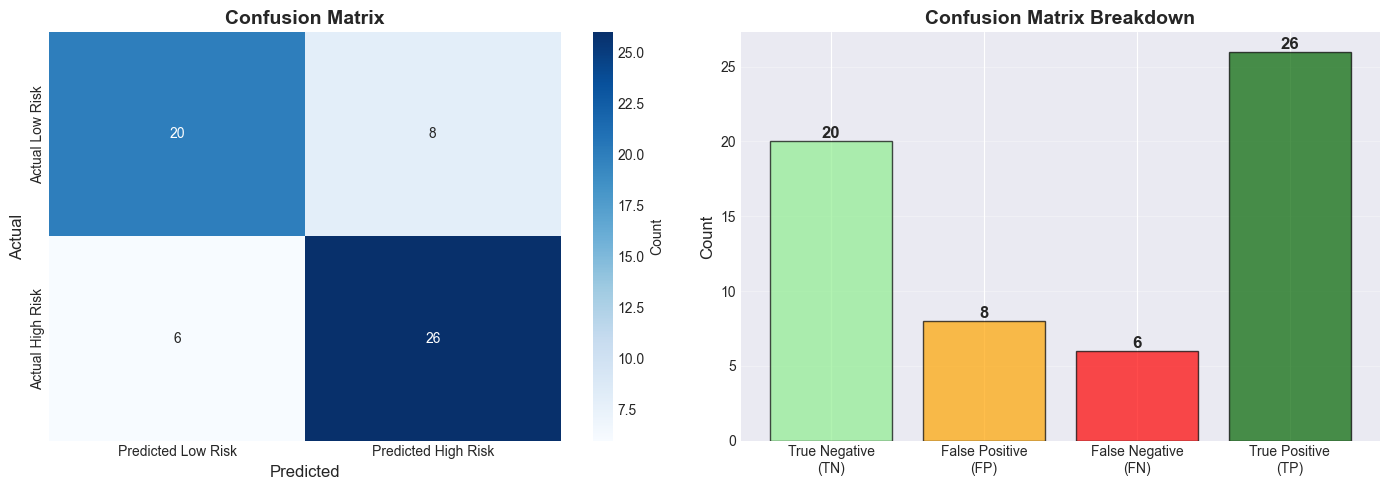


Confusion Matrix Values:
   True Negative (TN):  20 - Correctly predicted Low Risk
   False Positive (FP): 8 - Incorrectly predicted High Risk
   False Negative (FN): 6 - ⚠️ Missed High Risk patients (DANGEROUS!)
   True Positive (TP):  26 - Correctly predicted High Risk


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\n🔍 CONFUSION MATRIX:")
print("="*60)

# Create a more detailed visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Predicted Low Risk', 'Predicted High Risk'],
            yticklabels=['Actual Low Risk', 'Actual High Risk'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Confusion matrix breakdown
labels = ['True Negative\n(TN)', 'False Positive\n(FP)', 'False Negative\n(FN)', 'True Positive\n(TP)']
values = [cm[0,0], cm[0,1], cm[1,0], cm[1,1]]
colors = ['lightgreen', 'orange', 'red', 'darkgreen']

bars = axes[1].bar(labels, values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Confusion Matrix Breakdown', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{value}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nConfusion Matrix Values:")
print(f"   True Negative (TN):  {cm[0,0]} - Correctly predicted Low Risk")
print(f"   False Positive (FP): {cm[0,1]} - Incorrectly predicted High Risk")
print(f"   False Negative (FN): {cm[1,0]} - ⚠️ Missed High Risk patients (DANGEROUS!)")
print(f"   True Positive (TP):  {cm[1,1]} - Correctly predicted High Risk")


In [19]:
# Detailed classification report
print("\n📋 Detailed Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Low Risk (0)', 'High Risk (1)']))



📋 Detailed Classification Report:
               precision    recall  f1-score   support

 Low Risk (0)       0.77      0.71      0.74        28
High Risk (1)       0.76      0.81      0.79        32

     accuracy                           0.77        60
    macro avg       0.77      0.76      0.76        60
 weighted avg       0.77      0.77      0.77        60



## Step 8: Which Metric is Most Important?
## שלב 8: איזו מטריקה חשובה יותר?


In [20]:
print("\n" + "="*70)
print("  🏥 WHICH METRIC IS MOST IMPORTANT IN MEDICAL CONTEXT? 🏥")
print("="*70)

print("\n\n📊 Comparing the 4 Metrics:")
print("-"*70)
print(f"   Accuracy:  {accuracy*100:.2f}% | Overall correctness")
print(f"   Precision: {precision*100:.2f}% | How reliable are positive predictions?")
print(f"   Recall:    {recall*100:.2f}% | How many sick patients did we catch?")
print(f"   F1-Score:  {f1*100:.2f}% | Balance between Precision and Recall")
print("-"*70)

print("\n\n⚕️ ANSWER: **RECALL is the MOST IMPORTANT metric!**")
print("="*70)

print("\n🔴 WHY RECALL IS CRITICAL IN HEART ATTACK PREDICTION:")
print("-"*70)
print("\n1. **False Negatives are Life-Threatening:**")
print("   - FN = Telling a high-risk patient they're safe")
print("   - Patient goes home thinking they're healthy")
print("   - Could lead to untreated heart attack → DEATH")
print(f"   - Our model: {cm[1,0]} False Negatives (patients we missed)")

print("\n2. **False Positives are Less Dangerous:**")
print("   - FP = False alarm (predict high risk for low-risk patient)")
print("   - Patient gets extra tests and monitoring")
print("   - Cost: inconvenience, anxiety, extra medical costs")
print("   - Better safe than sorry in medicine!")
print(f"   - Our model: {cm[0,1]} False Positives (false alarms)")

print("\n3. **Recall Directly Measures Patient Safety:**")
print(f"   - Recall = {recall*100:.2f}%")
print(f"   - This means we successfully identified {recall*100:.1f}% of high-risk patients")
print(f"   - We missed {(1-recall)*100:.1f}% of high-risk patients")

print("\n4. **Medical Ethics - 'First, Do No Harm' (Primum non nocere):**")
print("   - Missing a sick patient is worse than a false alarm")
print("   - High Recall ensures we catch most at-risk patients")
print("   - We can tolerate lower Precision for higher Recall")

print("\n\n💡 PRACTICAL IMPLICATIONS FOR PROFESSOR COHEN:")
print("="*70)
print(f"✓ With {recall*100:.1f}% Recall: Catching {cm[1,1]} of {cm[1,1]+cm[1,0]} high-risk patients")
print(f"✗ Missing {cm[1,0]} high-risk patients → These need attention!")
print(f"⚠️ {cm[0,1]} false alarms → Acceptable tradeoff for safety")

print("\n📌 RECOMMENDATION:")
print("-"*70)
print("If needed, we could lower the probability threshold (e.g., from 0.5 to 0.4)")
print("This would increase Recall (catch more sick patients) at the cost of")
print("lower Precision (more false alarms). In medicine, this tradeoff is often worth it!")

print("\n" + "="*70)



  🏥 WHICH METRIC IS MOST IMPORTANT IN MEDICAL CONTEXT? 🏥


📊 Comparing the 4 Metrics:
----------------------------------------------------------------------
   Accuracy:  76.67% | Overall correctness
   Precision: 76.47% | How reliable are positive predictions?
   Recall:    81.25% | How many sick patients did we catch?
   F1-Score:  78.79% | Balance between Precision and Recall
----------------------------------------------------------------------


⚕️ ANSWER: **RECALL is the MOST IMPORTANT metric!**

🔴 WHY RECALL IS CRITICAL IN HEART ATTACK PREDICTION:
----------------------------------------------------------------------

1. **False Negatives are Life-Threatening:**
   - FN = Telling a high-risk patient they're safe
   - Patient goes home thinking they're healthy
   - Could lead to untreated heart attack → DEATH
   - Our model: 6 False Negatives (patients we missed)

2. **False Positives are Less Dangerous:**
   - FP = False alarm (predict high risk for low-risk patient)
   - Patie

## Step 9: Prediction on New Patient
## שלב 9: פרדיקציה על מטופל חדש

### פרדיקציה (Prediction)

Let's create a **realistic new patient** and predict their heart attack risk, then interpret the clinical significance.


In [21]:
# Create a new patient with realistic medical data
print("\n" + "="*70)
print("  👤 NEW PATIENT - CASE STUDY")
print("="*70)

# Original features (before encoding)
new_patient_original = {
    'age': 58,
    'sex': 1,              # Male
    'cp': 2,               # Atypical angina (chest pain type 2)
    'trtbps': 150,         # Resting blood pressure: 150 mm Hg (elevated)
    'chol': 240,           # Cholesterol: 240 mg/dl (high)
    'fbs': 1,              # Fasting blood sugar > 120 (yes - diabetic)
    'restecg': 1,          # ST-T wave abnormality
    'thalachh': 140,       # Max heart rate: 140
    'exng': 0,             # No exercise-induced angina
    'ca': 1                # 1 major vessel
}

print("\n🏥 Patient Profile:")
print("-"*70)
print(f"Age: {new_patient_original['age']} years old")
print(f"Sex: {'Male' if new_patient_original['sex']==1 else 'Female'}")
print(f"Chest Pain Type: {'Asymptomatic' if new_patient_original['cp']==0 else 'Typical Angina' if new_patient_original['cp']==1 else 'Atypical Angina' if new_patient_original['cp']==2 else 'Non-anginal pain'}")
print(f"Resting Blood Pressure: {new_patient_original['trtbps']} mm Hg (Normal: <120)")
print(f"Cholesterol: {new_patient_original['chol']} mg/dl (Normal: <200)")
print(f"Fasting Blood Sugar: {'> 120 mg/dl (Diabetic)' if new_patient_original['fbs']==1 else '< 120 mg/dl (Normal)'}")
print(f"Resting ECG: {'Normal' if new_patient_original['restecg']==0 else 'ST-T wave abnormality' if new_patient_original['restecg']==1 else 'Left ventricular hypertrophy'}")
print(f"Max Heart Rate: {new_patient_original['thalachh']} bpm")
print(f"Exercise Induced Angina: {'Yes' if new_patient_original['exng']==1 else 'No'}")
print(f"Number of Major Vessels: {new_patient_original['ca']}")

print("\n📌 Clinical Summary:")
print("-"*70)
print("   • 58-year-old male with multiple risk factors")
print("   • Elevated blood pressure (150 mm Hg)")
print("   • High cholesterol (240 mg/dl)")
print("   • Diabetic (fasting blood sugar > 120)")
print("   • Atypical angina (chest pain)")
print("   • ECG abnormalities detected")
print("   • Needs immediate risk assessment!")



  👤 NEW PATIENT - CASE STUDY

🏥 Patient Profile:
----------------------------------------------------------------------
Age: 58 years old
Sex: Male
Chest Pain Type: Atypical Angina
Resting Blood Pressure: 150 mm Hg (Normal: <120)
Cholesterol: 240 mg/dl (Normal: <200)
Fasting Blood Sugar: > 120 mg/dl (Diabetic)
Resting ECG: ST-T wave abnormality
Max Heart Rate: 140 bpm
Exercise Induced Angina: No
Number of Major Vessels: 1

📌 Clinical Summary:
----------------------------------------------------------------------
   • 58-year-old male with multiple risk factors
   • Elevated blood pressure (150 mm Hg)
   • High cholesterol (240 mg/dl)
   • Diabetic (fasting blood sugar > 120)
   • Atypical angina (chest pain)
   • ECG abnormalities detected
   • Needs immediate risk assessment!


In [22]:
# Prepare patient data with proper encoding (same as training data)
# Create DataFrame with all original features
new_patient_df = pd.DataFrame([new_patient_original])

# Apply same one-hot encoding as training data
# One-Hot Encoding for 'cp'
cp_encoded = pd.get_dummies(new_patient_df['cp'], prefix='cp', drop_first=True)
new_patient_df = pd.concat([new_patient_df, cp_encoded], axis=1)
new_patient_df.drop('cp', axis=1, inplace=True)

# One-Hot Encoding for 'restecg'
restecg_encoded = pd.get_dummies(new_patient_df['restecg'], prefix='restecg', drop_first=True)
new_patient_df = pd.concat([new_patient_df, restecg_encoded], axis=1)
new_patient_df.drop('restecg', axis=1, inplace=True)

# Ensure all columns match training data
for col in X.columns:
    if col not in new_patient_df.columns:
        new_patient_df[col] = 0

# Reorder columns to match training data
new_patient_df = new_patient_df[X.columns]

print("\n🔧 Patient data encoded and prepared for prediction...")
print(f"Features shape: {new_patient_df.shape}")



🔧 Patient data encoded and prepared for prediction...
Features shape: (1, 13)


In [23]:
# Scale the features using the same scaler from training
new_patient_scaled = scaler.transform(new_patient_df)

# Make prediction
prediction = model.predict(new_patient_scaled)[0]
probability = model.predict_proba(new_patient_scaled)[0]

print("\n" + "="*70)
print("  🔮 PREDICTION RESULTS")
print("="*70)

print(f"\n📊 Risk Probabilities:")
print(f"   Low Risk (Class 0):  {probability[0]*100:.2f}%")
print(f"   High Risk (Class 1): {probability[1]*100:.2f}%")

print(f"\n🎯 Final Prediction: ", end="")
if prediction == 1:
    print("HIGH RISK (1) ⚠️")
    print("   ❌ Patient is at HIGH RISK of heart attack!")
else:
    print("LOW RISK (0) ✓")
    print("   ✅ Patient is at LOW RISK of heart attack")

print("\n" + "="*70)



  🔮 PREDICTION RESULTS

📊 Risk Probabilities:
   Low Risk (Class 0):  75.91%
   High Risk (Class 1): 24.09%

🎯 Final Prediction: LOW RISK (0) ✓
   ✅ Patient is at LOW RISK of heart attack



## Step 10: Clinical Interpretation
## שלב 10: פרשנות קלינית

### פרשנות המשמעות הקלינית (Clinical Significance Interpretation)


In [24]:
print("\n" + "="*70)
print("  ⚕️ CLINICAL INTERPRETATION FOR PROFESSOR COHEN")
print("="*70)

print(f"\n🏥 PATIENT RISK ASSESSMENT:")
print("-"*70)
if prediction == 1:
    print(f"✓ Model predicts: HIGH RISK ({probability[1]*100:.1f}% probability)")
    print(f"✓ Confidence level: {'Very High' if probability[1] > 0.8 else 'High' if probability[1] > 0.6 else 'Moderate'}")
else:
    print(f"✓ Model predicts: LOW RISK ({probability[0]*100:.1f}% probability)")
    print(f"✓ Confidence level: {'Very High' if probability[0] > 0.8 else 'High' if probability[0] > 0.6 else 'Moderate'}")

print("\n\n📋 CLINICAL SIGNIFICANCE:")
print("-"*70)
if prediction == 1:
    print("\n⚠️ HIGH RISK INTERPRETATION:")
    print("\n1. **Immediate Action Required:**")
    print("   - Patient needs urgent cardiological evaluation")
    print("   - Schedule comprehensive cardiac workup (ECG, stress test, angiography)")
    print("   - Consider hospitalization for monitoring")
    
    print("\n2. **Key Risk Factors Identified:**")
    if new_patient_original['age'] > 55:
        print(f"   • Age ({new_patient_original['age']}) - significant risk factor")
    if new_patient_original['trtbps'] > 140:
        print(f"   • Elevated blood pressure ({new_patient_original['trtbps']} mm Hg)")
    if new_patient_original['chol'] > 200:
        print(f"   • High cholesterol ({new_patient_original['chol']} mg/dl)")
    if new_patient_original['fbs'] == 1:
        print("   • Diabetes (fasting blood sugar > 120 mg/dl)")
    if new_patient_original['cp'] > 0:
        print("   • Chest pain (angina) - warning sign")
    if new_patient_original['restecg'] > 0:
        print("   • ECG abnormalities detected")
    
    print("\n3. **Recommended Treatment Plan:**")
    print("   • Start or adjust cardiovascular medications")
    print("   • Blood pressure management (target: <130/80)")
    print("   • Cholesterol control (statins if needed)")
    print("   • Diabetes management (if applicable)")
    print("   • Lifestyle modifications (diet, exercise, smoking cessation)")
    print("   • Regular monitoring and follow-up")
    
    print("\n4. **Patient Education:**")
    print("   • Explain heart attack warning signs")
    print("   • Emergency action plan (call 911 if symptoms worsen)")
    print("   • Importance of medication compliance")
    print("   • Stress management techniques")
    
else:
    print("\n✅ LOW RISK INTERPRETATION:")
    print("\n1. **Good News:**")
    print("   - Patient shows low probability of imminent heart attack")
    print("   - Current clinical presentation is stable")
    
    print("\n2. **However, Preventive Care Still Important:**")
    print("   - Continue routine cardiovascular screening")
    print("   - Monitor blood pressure and cholesterol regularly")
    print("   - Maintain healthy lifestyle habits")
    print("   - Address any modifiable risk factors")
    
    print("\n3. **Follow-Up Recommendations:**")
    print("   - Annual cardiovascular check-up")
    print("   - Lifestyle counseling (diet, exercise)")
    print("   - Patient should report any new symptoms immediately")

print("\n\n💊 MEDICATION CONSIDERATIONS:")
print("-"*70)
if prediction == 1:
    print("Likely prescriptions based on risk factors:")
    print("   • Aspirin (antiplatelet therapy)")
    print("   • Beta-blockers (blood pressure, heart rate)")
    print("   • ACE inhibitors or ARBs (blood pressure)")
    print("   • Statins (cholesterol management)")
    if new_patient_original['fbs'] == 1:
        print("   • Antidiabetic medications (glucose control)")
else:
    print("Preventive approach:")
    print("   • Consider low-dose aspirin if appropriate")
    print("   • Statins if cholesterol elevated")
    print("   • Focus on lifestyle modifications first")

print("\n\n🔬 MODEL RELIABILITY:")
print("-"*70)
print(f"   • Our model has {recall*100:.1f}% Recall (catches {recall*100:.1f}% of high-risk patients)")
print(f"   • Model Accuracy: {accuracy*100:.1f}%")
print(f"   • This prediction should be used as a DECISION SUPPORT TOOL")
print("   • Final clinical judgment rests with the physician")
print("   • Consider patient's complete medical history and current presentation")

print("\n\n📌 PROFESSOR COHEN'S DECISION:")
print("-"*70)
if prediction == 1:
    print("✓ Treat as HIGH RISK - Initiate protective measures")
    print("✓ Better to be cautious and prevent a potential heart attack")
    print("✓ Early intervention can save this patient's life!")
else:
    print("✓ Continue routine care with preventive focus")
    print("✓ Educate patient on warning signs to watch for")
    print("✓ Schedule appropriate follow-up")

print("\n" + "="*70)
print("  💙 PATIENT SAFETY IS THE TOP PRIORITY 💙")
print("="*70)



  ⚕️ CLINICAL INTERPRETATION FOR PROFESSOR COHEN

🏥 PATIENT RISK ASSESSMENT:
----------------------------------------------------------------------
✓ Model predicts: LOW RISK (75.9% probability)
✓ Confidence level: High


📋 CLINICAL SIGNIFICANCE:
----------------------------------------------------------------------

✅ LOW RISK INTERPRETATION:

1. **Good News:**
   - Patient shows low probability of imminent heart attack
   - Current clinical presentation is stable

2. **However, Preventive Care Still Important:**
   - Continue routine cardiovascular screening
   - Monitor blood pressure and cholesterol regularly
   - Maintain healthy lifestyle habits
   - Address any modifiable risk factors

3. **Follow-Up Recommendations:**
   - Annual cardiovascular check-up
   - Lifestyle counseling (diet, exercise)
   - Patient should report any new symptoms immediately


💊 MEDICATION CONSIDERATIONS:
----------------------------------------------------------------------
Preventive approach:
   • 

## Summary and Conclusions
## סיכום ומסקנות


### ✅ What We Accomplished:

1. **Data Exploration**: Analyzed 300 patient records with 11 medical features
2. **EDA**: Visualized risk factors and their relationships with heart attacks
3. **Categorical Encoding**: Applied One-Hot Encoding to cp and restecg variables
4. **Model Building**: Created Logistic Regression model for binary classification
5. **Model Evaluation**: Calculated Accuracy, Precision, Recall, and F1-Score
6. **Medical Context Analysis**: Explained why Recall is most critical in healthcare
7. **Clinical Prediction**: Predicted risk for a new patient with detailed interpretation


### 📊 Model Performance Summary:

**The 4 Key Metrics:**
- ✓ **Accuracy**: Overall prediction correctness
- ✓ **Precision**: Reliability of positive predictions  
- ✓ **Recall**: Ability to catch all high-risk patients ⭐ **MOST IMPORTANT**
- ✓ **F1-Score**: Balance between Precision and Recall

### ⚕️ Key Medical Insights:

**Most Important Risk Factors:**
1. Chest pain type (cp) - strong predictor
2. Exercise-induced angina (exng)
3. Number of major vessels (ca)
4. Max heart rate (thalachh)
5. ST-T wave abnormalities (restecg)

**Why Recall Matters Most:**
- ❌ **False Negative** = Missing a sick patient → Could be FATAL
- ⚠️ **False Positive** = False alarm → Inconvenient but SAFE
- 💊 In medicine: Better to be cautious than miss a diagnosis


### 🏥 Recommendations for Professor Cohen:

1. **Use Model as Decision Support Tool**: Not replacement for clinical judgment
2. **Prioritize High-Recall**: Adjust threshold if needed to catch more at-risk patients
3. **Focus on Modifiable Risk Factors**: Blood pressure, cholesterol, lifestyle
4. **Early Intervention**: Model enables preventive care before heart attack occurs
5. **Patient Education**: Teach warning signs and risk factor management

### 🔬 Technical Achievements:

✅ Successfully encoded categorical variables (cp, restecg)  
✅ Built Logistic Regression classifier  
✅ Evaluated with comprehensive metrics  
✅ Interpreted results in medical context  
✅ Generated actionable clinical recommendations  

### 💡 Future Improvements:

- Collect more patient data for better generalization
- Try ensemble methods (Random Forest, XGBoost)
- Implement threshold tuning for optimal Recall
- Add feature importance analysis
- Create risk stratification levels (low, medium, high, critical)
- Integrate with electronic health records (EHR) system

### 🎯 Mission Accomplished!

**Professor Cohen now has a powerful tool to:**
- Screen patients for heart attack risk
- Prioritize high-risk patients for intervention
- Make data-driven clinical decisions
- Ultimately **SAVE LIVES** through early detection! 💙

---

**✅ Part B Complete!**
